<a href="https://colab.research.google.com/drive/1ZjJ1elEfH-tINokq5E-6kvWhqDguK--x" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Image Processing & Analysis </center></h1> 

Image processing generally involves changing images, usually in ways that help interpretation later. It provides a whole host of tools that can be applied to puzzle-solving. When piecing together processing steps to form a workflow, we usually have two main stages:

- Preprocessing: the stuff you do to clean up the image, e.g. subtract the background, use a filter to reduce noise, etc.
- Segmentation: is the stuff you do to identify the things in the image you care about, e.g. apply a threshold to locate interesting features.

Image analysis, on the other hand, involves converting images into measurements. When image analysis is our goal, we almost always need image processing to get there.


### Table of Contents 

1. [Image Fundementals](#section1)

1. [Image Filtering](#section2)

1. [Image Compression](#section3)

1. [Edge Detection](#section4) 

*******************************************************************************************


In [2]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from skimage import color
from skimage import io


## $\color{Blue}{\text{Image Fundementals}}$  <a class="anchor" id="section1"></a>

### Read & show an image

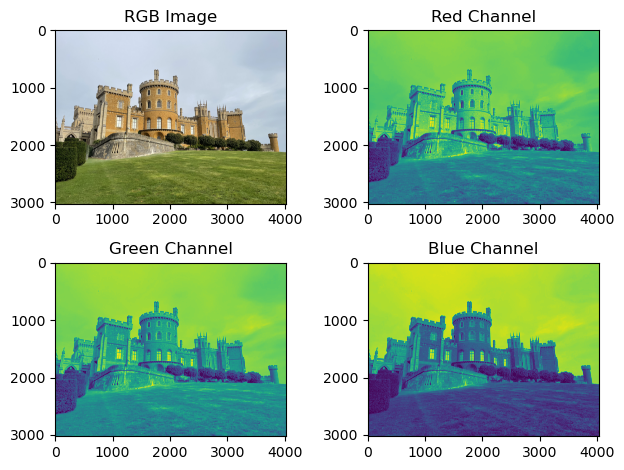

In [3]:
# Read an image - we need to know the full path to wherever it is
im1 = imageio.imread('Belvoir Castle.jpg')

#find out the dimsnions of the image
height1, width1, colours1 = im1.shape

#convert the image to a numpy array for easier mathematical use
nparray1 = np.asarray(im1)

#tcheck the maximum and minimum valeus of the colour channels
colourchannel = 0 #specify the colour channel you'd like to check. This could either be 0 (red), 1 (green), or 2 (blue)
mincolour = np.min(nparray1[:,:,colourchannel]) #min
maxcolour = np.min(nparray1[:,:,colourchannel]) #max

#show the image
plt.figure
#RGB image
plt.subplot(2,2,1)
plt.imshow(nparray1)
plt.title('RGB Image')
#red channel
plt.subplot(2,2,2)
plt.imshow(nparray1[:,:,0])
plt.title('Red Channel')
#Green channel
plt.subplot(2,2,3)
plt.imshow(nparray1[:,:,1])
plt.title('Green Channel')
#blue channel
plt.subplot(2,2,4)
plt.imshow(nparray1[:,:,2])
plt.title('Blue Channel')
plt.tight_layout()
plt.show()


### Convert the RBG image (three channels) to a grayscle image (single-channel)

Converting an RBG image to tis grayscaled verion helps in simplifying algorithms and as well eliminates the complexities related to computational requirements.

For some types of analysis, grayscale images may often have a better contrast than color due to the fact that there are more 
pronounced differences in intensities.

The RGB values are converted to grayscale using the NTSC formula: $\left(0.299 \times \mathrm{Red}\right) + \left(0.587 \times \mathrm{Green}\right) +\left( 0.114 \times \mathrm{Blue}\right)$. 
This formula closely represents the average person's relative perception of the brightness of red, green, and blue light.

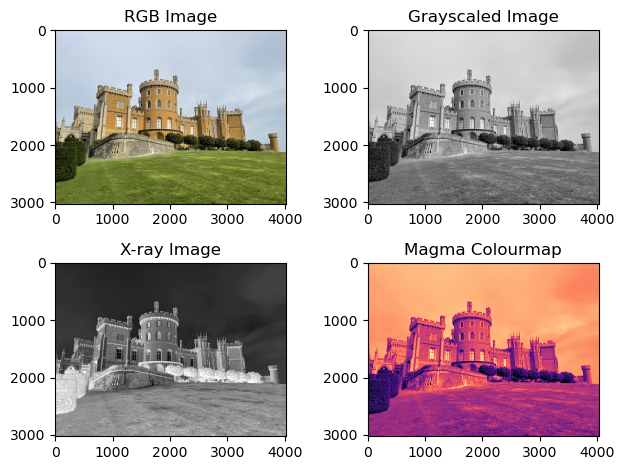

In [4]:
#convert the image to its grayscle version
grayimg1 = color.rgb2gray(nparray1) #or simply we can use grayimg1 = np.mean(nparray1,-1)

#show the image
plt.figure()
#show the original
plt.subplot(2,2,1)
plt.imshow(nparray1)
plt.title('RGB Image')
#show the grayscaled image
plt.subplot(2,2,2)
plt.imshow(grayimg1,cmap='gray')
plt.title('Grayscaled Image')
#show the x-rayed grayscaled image
plt.subplot(2,2,3)
plt.imshow(grayimg1,cmap='gray_r')
plt.title('X-ray Image')
plt.subplot(2,2,4)
#try another colourmap
plt.imshow(grayimg1,cmap='magma')
plt.title('Magma Colourmap')
plt.tight_layout()
plt.show()

### Comparing histograms & statistics

#### Two Different Images

In [4]:
#read and improt another image
im2 = imageio.imread('Bavarian Alps.jpg')
#find out the dimsnions of the image
height2, width2, colours2 = im2.shape
#convert the image to a numpy array for easier mathematical use
nparray2 = np.asarray(im2)
#convert the image to its grayscle version
grayimg2 = color.rgb2gray(nparray2)

In [5]:
#calculate statistics
#The intensity of a pixel is expressed within a given range between a minimum and a maximum, inclusive. 
#This range is represented in an abstract way as a range from 0 (or 0%) (total absence, black) and 1 (or 100%) 
#(total presence, white), with any fractional values in between.
#mean
mean1 = np.mean(grayimg1)
mean2 = np.mean(grayimg2)
#std
std1 = np.std(grayimg1)
std2 = np.std(grayimg2)
#max
max1 = np.max(grayimg1)
max2 = np.max(grayimg2)
#min
min1 = np.min(grayimg1)
min2 = np.min(grayimg2)

In [6]:
#create the histograms for both images
#Belvoir Castle
histogram1, bin_edges1 = np.histogram(grayimg1, bins=256, range=(0, 1))
#Bavarian Alps
histogram2, bin_edges2 = np.histogram(grayimg2, bins=256, range=(0, 1))


#reshape the images to be 1D array for a normal histogram plots
grayimg1_flat = grayimg1.flatten()
grayimg2_flat = grayimg2.flatten()

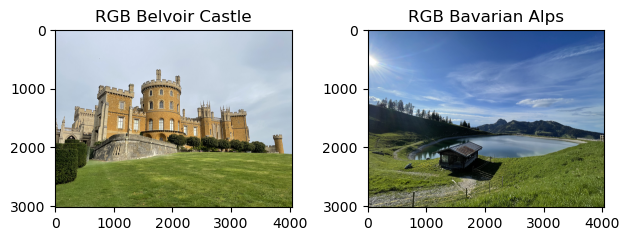

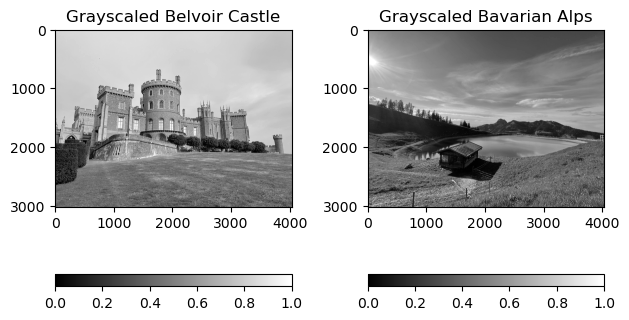

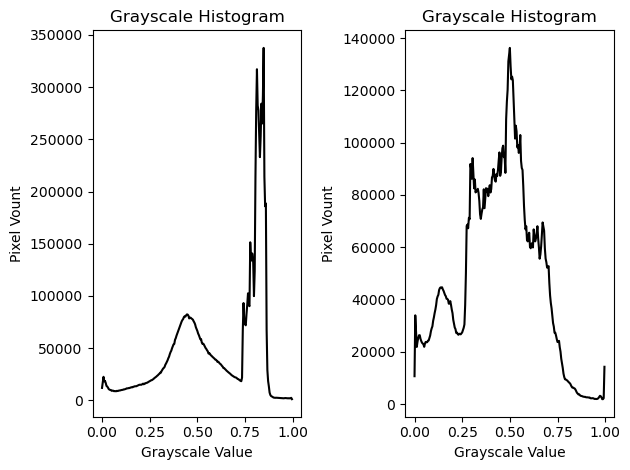

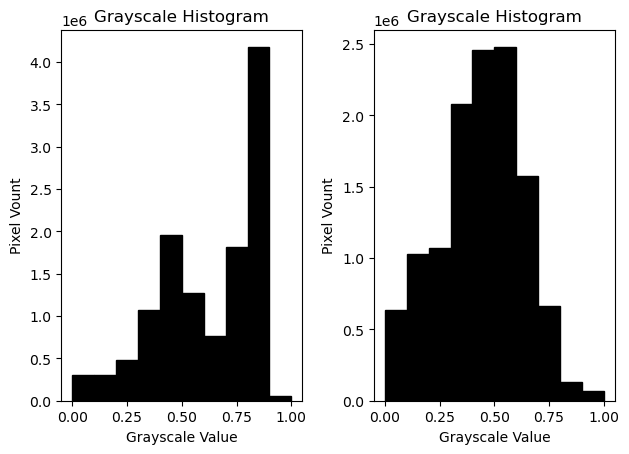

In [7]:
#show both images
plt.figure()
#image 1: RGB Belvoir Castle
plt.subplot(1,2,1)
plt.imshow(nparray1)
plt.title('RGB Belvoir Castle')
#image 2: RGB Bavarian Alps
plt.subplot(1,2,2)
plt.imshow(nparray2)
plt.title('RGB Bavarian Alps')
plt.tight_layout()
plt.show()

plt.figure()
#image 1: Gray Belvoir Castle
plt.subplot(1,2,1)
plt.imshow(grayimg1,cmap='gray')
plt.title('Grayscaled Belvoir Castle')
plt.colorbar(orientation="horizontal")
#image 2: Gray Bavarian Alps
plt.subplot(1,2,2)
plt.imshow(grayimg2,cmap='gray')
plt.title('Grayscaled Bavarian Alps')
plt.colorbar(orientation="horizontal")
plt.tight_layout()
plt.show()

plt.figure()
#histogram of Gray Belvoir Castle pixels data
plt.subplot(1,2,1)
plt.plot(bin_edges1[0:-1], histogram1,'k')
plt.title("Grayscale Histogram")
plt.xlabel("Grayscale Value")
plt.ylabel("Pixel Vount")
#histogram of Gray Bavarian Alps pixels data
plt.subplot(1,2,2)
plt.plot(bin_edges2[0:-1], histogram2,'k')
plt.title("Grayscale Histogram")
plt.xlabel("Grayscale Value")
plt.ylabel("Pixel Vount")
plt.tight_layout()
plt.show()

plt.figure()
#histogram of Gray Belvoir Castle pixels data
plt.subplot(1,2,1)
plt.hist(grayimg1_flat,color='k',edgecolor='black')
plt.title("Grayscale Histogram")
plt.xlabel("Grayscale Value")
plt.ylabel("Pixel Vount")
#histogram of Gray Bavarian Alps pixels data
plt.subplot(1,2,2)
plt.hist(grayimg2_flat,color='k',edgecolor='black')
plt.title("Grayscale Histogram")
plt.xlabel("Grayscale Value")
plt.ylabel("Pixel Vount")
plt.tight_layout()
plt.show()

#### Two similar images

In [8]:
#define the one colour channel of Belvoir Castle image 
red_channel_img1   = nparray1[:,:,0]
green_channel_img1 = nparray1[:,:,1]
blue_channel_img1  = nparray1[:,:,2]

In [9]:
#calculate statistics of all images
#mean
mean_gray               = np.mean(grayimg1)
mean_red_channel_img1   = np.mean(red_channel_img1)
mean_green_channel_img1 = np.mean(green_channel_img1)
mean_blue_channel_img1  = np.mean(blue_channel_img1)
#std
std_gray                = np.std(grayimg1)
std_red_channel_img1    = np.std(red_channel_img1)
std_green_channel_img1  = np.std(green_channel_img1)
std_blue_channel_img1   = np.std(blue_channel_img1)
#max
max_gray                = np.max(grayimg1)
max_red_channel_img1    = np.max(red_channel_img1)
max_green_channel_img1  = np.max(green_channel_img1)
max_blue_channel_img1   = np.max(blue_channel_img1)
#min
min_gray                = np.min(grayimg1)
min_red_channel_img1    = np.min(red_channel_img1)
min_green_channel_img1  = np.min(green_channel_img1)
min_blue_channel_img1   = np.min(blue_channel_img1)


In [10]:
#create the histograms for all images
#gray
histogram_gray, bin_edges_gray = np.histogram(grayimg1, bins=256, range=(0, 1))
#red channel
histogram_redchannel, bin_edges_redchannel     = np.histogram(red_channel_img1, bins=256, range=(0, 256))
#green channel
histogram_greenchannel, bin_edges_greenchannel = np.histogram(green_channel_img1, bins=256, range=(0, 256))
#blue channel
histogram_bluechannel, bin_edges_bluechannel   = np.histogram(blue_channel_img1, bins=256, range=(0, 256))


#reshape the images to be 1D array for a normal histogram plots
gray_flat  = grayimg1.flatten()
red_flat   = red_channel_img1.flatten()
green_flat = green_channel_img1.flatten()
blue_flat  = blue_channel_img1.flatten() 

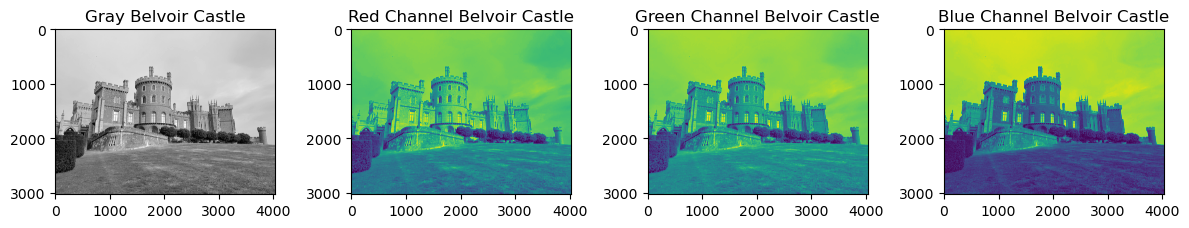

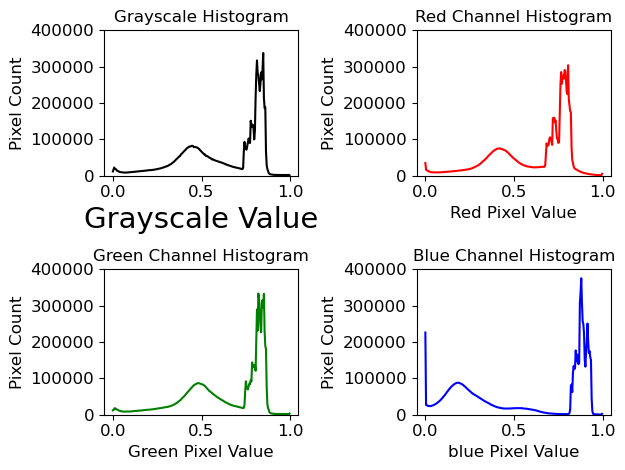

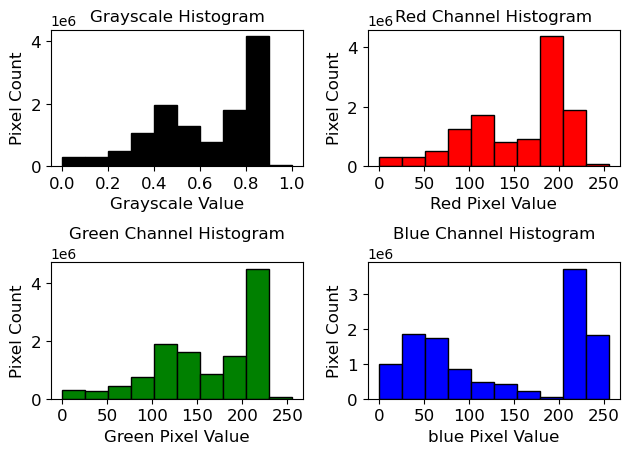

In [11]:
#show both images
plt.figure(figsize=(12, 14))
#image 1: Gray Belvoir Castle
plt.subplot(1,4,1)
plt.imshow(grayimg1,cmap='gray')
plt.title('Gray Belvoir Castle')
#image 2: Red Channel Belvoir Castle
plt.subplot(1,4,2)
plt.imshow(red_channel_img1)
plt.title('Red Channel Belvoir Castle')
#image 3: Green Channel Belvoir Castle
plt.subplot(1,4,3)
plt.imshow(green_channel_img1)
plt.title('Green Channel Belvoir Castle')
#image 4: Blue Channel Belvoir Castle
plt.subplot(1,4,4)
plt.imshow(blue_channel_img1)
plt.title('Blue Channel Belvoir Castle')
plt.tight_layout()
plt.show()

plt.figure()
#histogram of Gray Belvoir Castle pixels data
plt.subplot(2,2,1)
plt.plot(bin_edges1[0:-1], histogram_gray,'k')
plt.title("Grayscale Histogram",fontsize=12)
plt.xlabel("Grayscale Value",fontsize=21)
plt.ylabel("Pixel Count",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0 ,400000])
#histogram of Red Channel Belvoir Castle
plt.subplot(2,2,2)
plt.plot(bin_edges2[0:-1], histogram_redchannel,'r')
plt.title("Red Channel Histogram",fontsize=12)
plt.xlabel("Red Pixel Value",fontsize=12)
plt.ylabel("Pixel Count",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,400000])
#histogram of Green Channel Belvoir Castle
plt.subplot(2,2,3)
plt.plot(bin_edges2[0:-1], histogram_greenchannel,'g')
plt.title("Green Channel Histogram",fontsize=12)
plt.xlabel("Green Pixel Value",fontsize=12)
plt.ylabel("Pixel Count",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,400000])
#histogram of Blue Channel Belvoir Castle
plt.subplot(2,2,4)
plt.plot(bin_edges2[0:-1], histogram_bluechannel,'b')
plt.title("Blue Channel Histogram",fontsize=12)
plt.xlabel("blue Pixel Value",fontsize=12)
plt.ylabel("Pixel Count",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0 ,400000])
plt.tight_layout()
plt.show()

plt.figure()
#histogram of Gray Belvoir Castle pixels data
plt.subplot(2,2,1)
plt.hist(gray_flat,color='k',edgecolor='black')
plt.title("Grayscale Histogram",fontsize=12)
plt.xlabel("Grayscale Value",fontsize=12)
plt.ylabel("Pixel Count",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#histogram of Red Channel Belvoir Castle
plt.subplot(2,2,2)
plt.hist(red_flat,color='r',edgecolor='black')
plt.title("Red Channel Histogram",fontsize=12)
plt.xlabel("Red Pixel Value",fontsize=12)
plt.ylabel("Pixel Count",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#histogram of Green Channel Belvoir Castle
plt.subplot(2,2,3)
plt.hist(green_flat,color='g',edgecolor='black')
plt.title("Green Channel Histogram",fontsize=12)
plt.xlabel("Green Pixel Value",fontsize=12)
plt.ylabel("Pixel Count",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#histogram of blue Channel Belvoir Castle
plt.subplot(2,2,4)
plt.hist(blue_flat,color='b',edgecolor='black')
plt.title("Blue Channel Histogram",fontsize=12)
plt.xlabel("blue Pixel Value",fontsize=12)
plt.ylabel("Pixel Count",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## $\color{Blue}{\text{Image Filtering}}$  <a class="anchor" id="section2"></a>

In [48]:
#add noise to the gray image
B = grayimg1+5*np.random.rand(grayimg1.shape[0],grayimg1.shape[1])

#define middle of image width
mid_width = grayimg1.shape[1]/2
#define middle of image height
mid_height = grayimg1.shape[0]/2


In [49]:
#Caluclate the 2D Foruier Transform of the grayscaled image
grayimg1_fft = np.fft.fft2(grayimg1)
grayimg1_fft_shift = np.fft.fftshift(grayimg1_fft)

#Apply Foruier Trasnform on the noisy image
B_fft = np.fft.fft2(B)
B_fft_shift = np.fft.fftshift(B_fft)

#Define the wave number in 2D
kx = list(range(1, grayimg1.shape[1]+1))
ky = list(range(1, grayimg1.shape[0]+1))
KX, KY = np.meshgrid(kx, ky)

#### Gaussian Filter: Bell Function

In [51]:
#Building the Gaussian filter
#define the width of the Gaussian filter
Gaussian_width = 0.0001 #the smaller the width the better the filtering
#define the Gaussian function
F_Gaussian = np.exp(-Gaussian_width*(KX-mid_width)**2-Gaussian_width*(KY-mid_height)**2)

#apply/convolving the filter on/with the transform shifted image
B_fft_shift_Gaussianfiltered = B_fft_shift*F_Gaussian

#Reconstruct the filtered image
#shift it back
BtGaussianf = np.fft.ifftshift(B_fft_shift_Gaussianfiltered);
#apply the inverse of Frourier Transform
B_Gaussianfiltered = np.fft.ifft2(BtGaussianf);

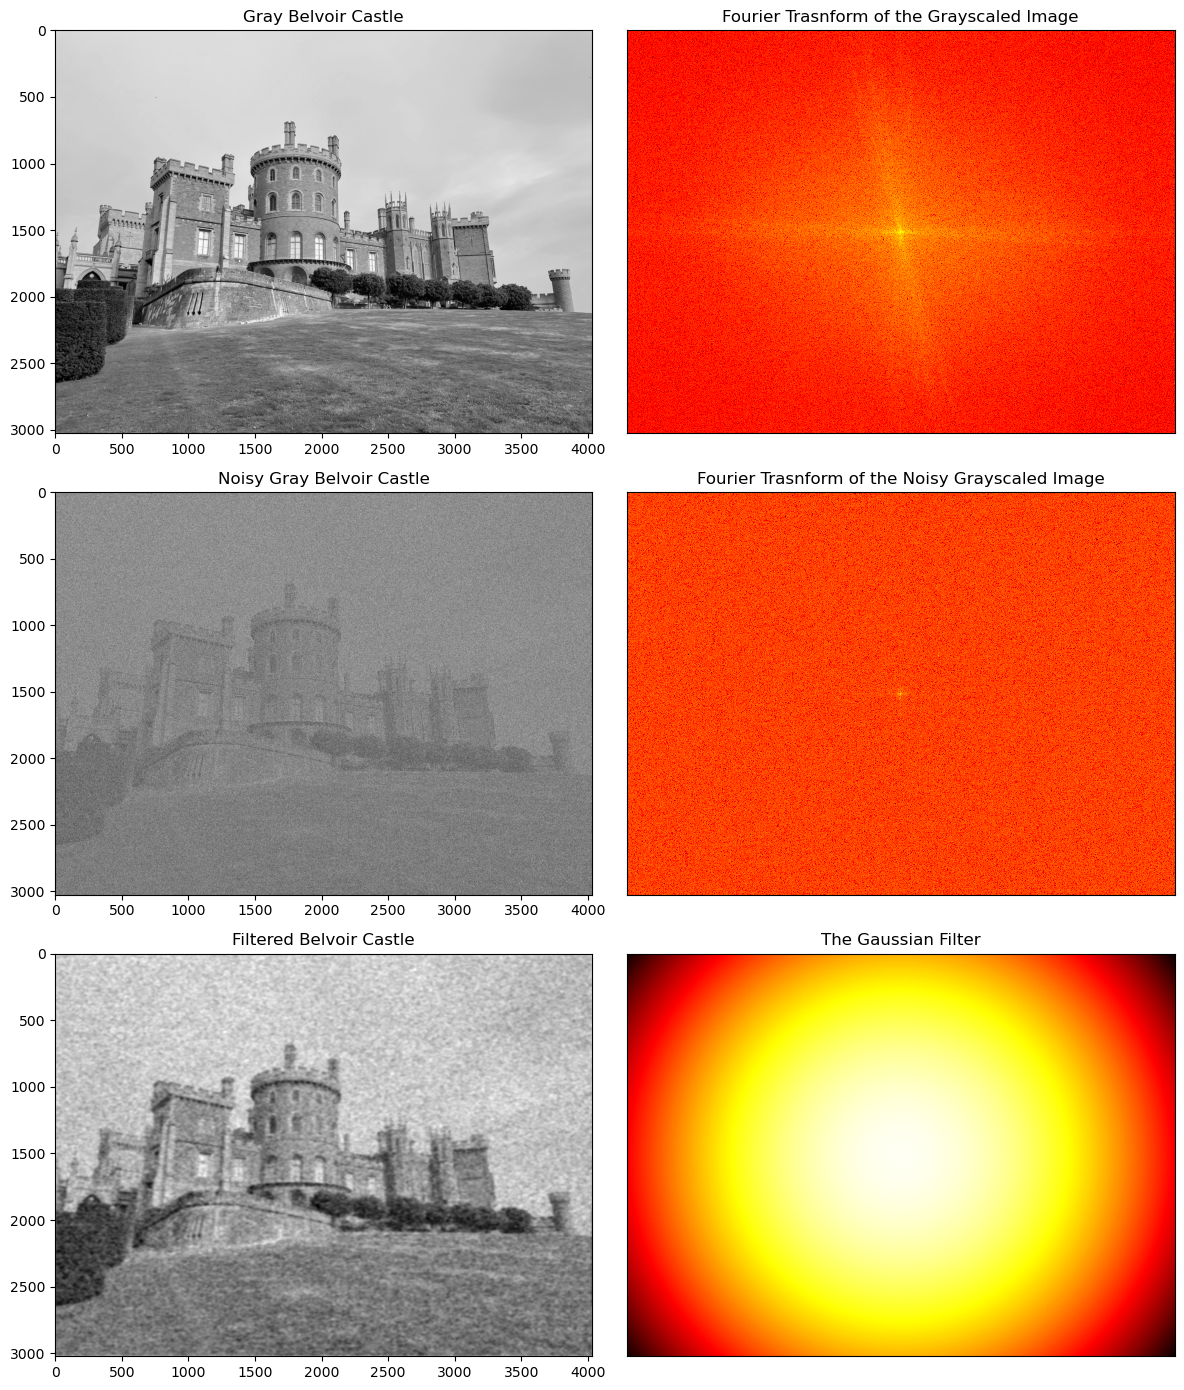

In [52]:
#visualise results
plt.figure(figsize=(12, 14))
#show the gray image
plt.subplot(3,2,1)
plt.imshow(grayimg1,cmap='gray')
plt.title('Gray Belvoir Castle')
#show the Fourier Trasform of the image
plt.subplot(3,2,2)
plt.pcolor(np.log(abs(grayimg1_fft_shift)),cmap='hot')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title('Fourier Trasnform of the Grayscaled Image')
#show the noisy image
plt.subplot(3,2,3)
plt.imshow(B,cmap='gray')
plt.title('Noisy Gray Belvoir Castle')
#show the Fourier Transform of the noisy image
plt.subplot(3,2,4)
plt.pcolor(np.log(abs(B_fft_shift)),cmap='hot')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title('Fourier Trasnform of the Noisy Grayscaled Image')
#show the reconstructed filtered image
plt.subplot(3,2,5)
plt.imshow(np.real(B_Gaussianfiltered),cmap='gray')
plt.title('Filtered Belvoir Castle')
#show the Gaussian filter
plt.subplot(3,2,6)
plt.pcolor(np.log(abs(B_fft_shift_Gaussianfiltered)),cmap='hot')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title('The Gaussian Filter')
plt.tight_layout()
plt.show()

#### Shannon Filter: Step Function

In [53]:
#Build the shannon (square/step) filter
#define the fiter width
Shannon_width = 100 #the smaller the width the better the filtering
#create the matrix of the filter as zero matrix with the same dimesnions of the noisy image
F_Shannon = np.zeros((grayimg1.shape[0], grayimg1.shape[1]))
#define the filter box dimensions
box_dim = 2*Shannon_width
#fill in the pixels fo the box with ones
Fones = np.ones((box_dim,box_dim))
#assign this box to the full rectangular mask of the image
F_Shannon[int((mid_height+1)-Shannon_width):int((mid_height+1)+Shannon_width),
          int((mid_width+1)-Shannon_width):int((mid_width+1)+Shannon_width)] = Fones

#apply/convolving the filter on/with the transform shifted image
B_fft_shift_Shannonfiltered = B_fft_shift*F_Shannon

#Reconstruct the filtered image
#shift it back
BtShannonf = np.fft.ifftshift(B_fft_shift_Shannonfiltered);
#apply the inverse of Frourier Transform
B_Shannonfiltered = np.fft.ifft2(BtShannonf);


C:\Users\homeuser\AppData\Local\Temp\ipykernel_4512\1466143899.py:29: RuntimeWarning: divide by zero encountered in log
  plt.pcolor(np.log(abs(B_fft_shift_Shannonfiltered)),cmap='hot')


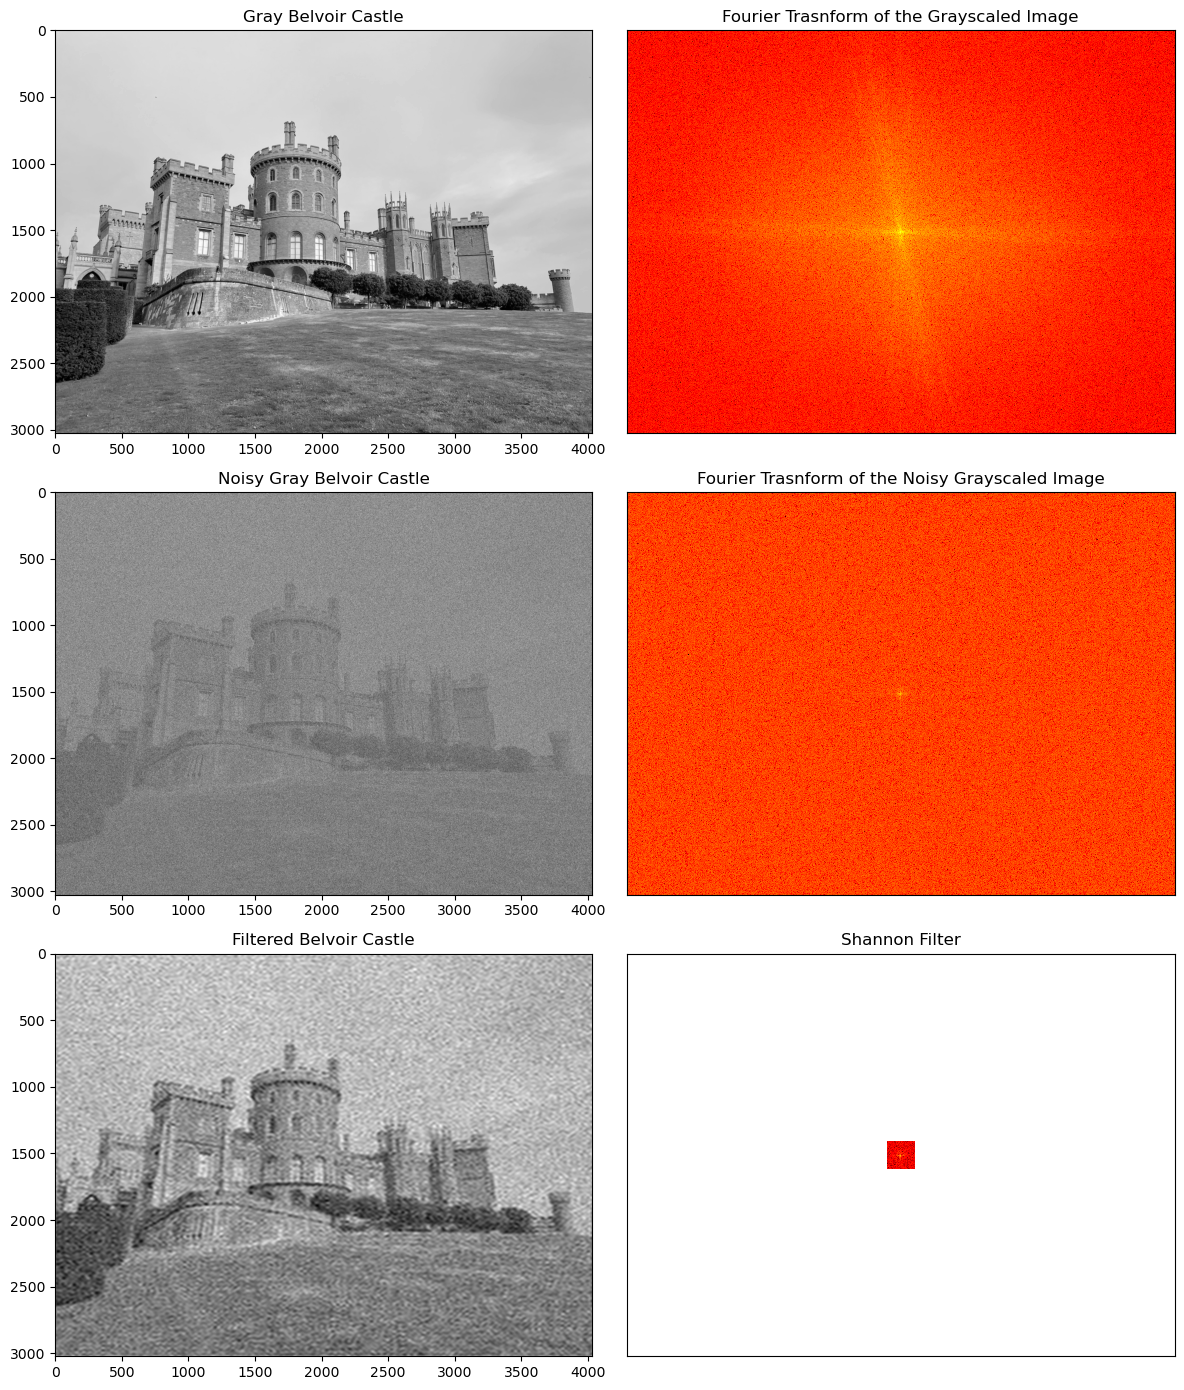

In [54]:
#visualise results
plt.figure(figsize=(12, 14))
#show the gray image
plt.subplot(3,2,1)
plt.imshow(grayimg1,cmap='gray')
plt.title('Gray Belvoir Castle')
#show the Fourier Trasform of the image
plt.subplot(3,2,2)
plt.pcolor(np.log(abs(grayimg1_fft_shift)),cmap='hot')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title('Fourier Trasnform of the Grayscaled Image')
#show the noisy image
plt.subplot(3,2,3)
plt.imshow(B,cmap='gray')
plt.title('Noisy Gray Belvoir Castle')
#show the Fourier Transform of the noisy image
plt.subplot(3,2,4)
plt.pcolor(np.log(abs(B_fft_shift)),cmap='hot')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title('Fourier Trasnform of the Noisy Grayscaled Image')
#show the reconstructed filtered image
plt.subplot(3,2,5)
plt.imshow(np.real(B_Shannonfiltered),cmap='gray')
plt.title('Filtered Belvoir Castle')
#show the Gaussian filter
plt.subplot(3,2,6)
plt.pcolor(np.log(abs(B_fft_shift_Shannonfiltered)),cmap='hot')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title('Shannon Filter')
plt.tight_layout()
plt.show()

## $\color{Blue}{\text{Image Compression}}$  <a class="anchor" id="section3"></a>

Compression is a process used to reduce the storage required to save an image or the bandwidth needed to transmit it. Since the number of bits (or pixels) usually required to represent the information in an image may be substantially less because of redundancy, image compression aims to reduce the number of bits required to represent an image by removing these redundancies and compressing important information as much as possible. 

For example, your smartphone camera saves photos by compressing them into a format that reduces their size. Photos can be huge files because of the high-quality cameras on modern smartphones, so compression saves storage space and makes it faster to send and receive a smaller compressed file over the internet. 

The same applied to videos. A typical gray‐scale image of  $512 \times 512$  pixels,  each represented by  $8$  bits, contains $256$  kilobytes of data. With the color information, the number of bytes is tripled. If we talk about video images of $25$ frames per second,  even one second of color video requires approximately  $19$ megabytes of memory. Thus, the necessity for compression is obvious. 

Among the vast number of methods that are used in image compression applications, two methods will be presented: 
- Singular Value Decomposition (SVD) 
- Fast Fourier Transform (FFT). 

#### SVD for Image Compression

<img src="SVDForImageCompressionAlgorithm.png" alt="SVDForImageCompressionAlgorithm" width="800"/>

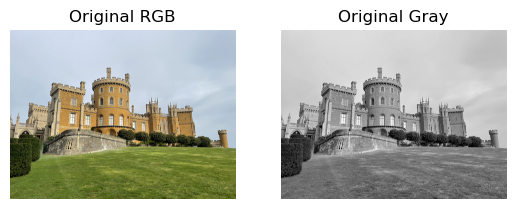

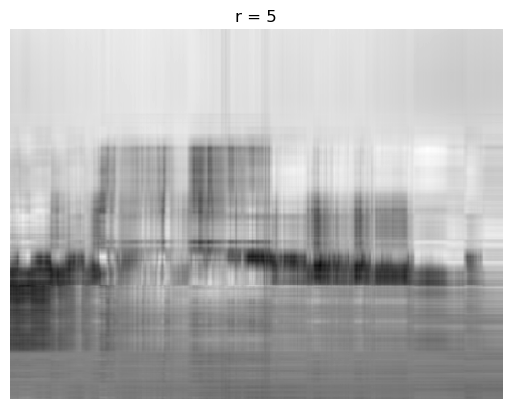

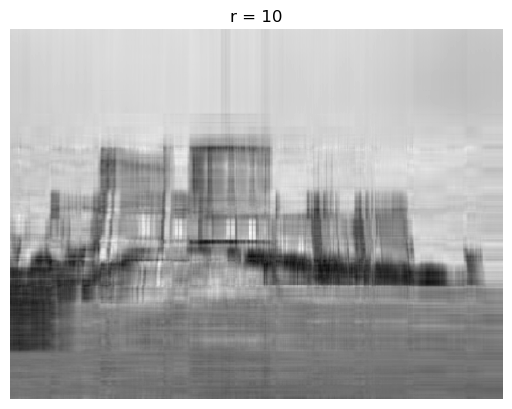

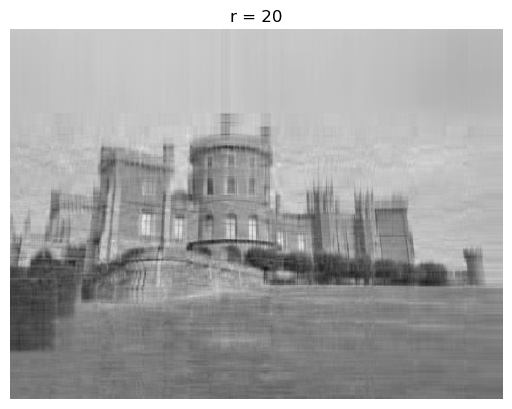

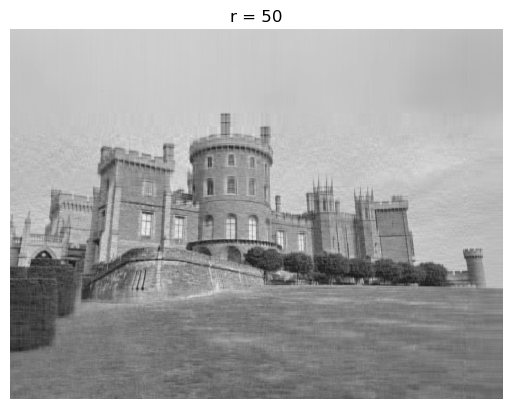

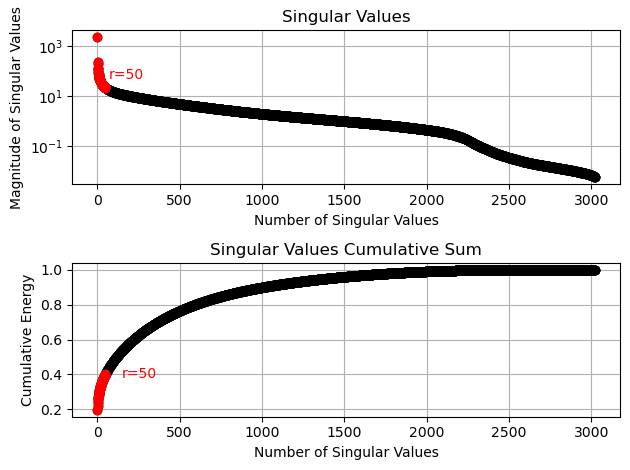

In [6]:
#show the original image
plt.figure()
#RGB
plt.subplot(1,2,1)
plt.imshow(nparray1)
plt.axis('off')
plt.title('Original RGB')
#Gray
plt.subplot(1,2,2)
plt.imshow(grayimg1, cmap='gray')
plt.axis('off')
plt.title('Original Gray')
plt.show()

#apply SVD on the gray version of the Belovir Castle image
U, S, VT = np.linalg.svd(grayimg1,full_matrices=False) 

#extract the diagonal elements/singular values
S = np.diag(S)

#go through several turncation orders
#set a counter 
j = 0
#loop over the chosen orders
for r in (5 ,10,20,50):
    #determin the reduced matrices
    U_r  = U[: ,:r]
    S_r  = S[0:r , :r]
    VT_r = VT[:r , :]
    #construct the approximated compressed image
    reconstimg = U_r @ S_r @ VT_r
    #show the approximated compressed images
    plt.figure(j+1)
    j += 1
    img = plt.imshow(reconstimg, cmap='gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()
           
        
#show the signular values
plt.figure()
#show the distribution of singular values
plt.subplot(2,1,1)
plt.semilogy(np.diag(S),'ko')
plt.plot(np.diag(S[:50]),'ro')
plt.text(70, 50, 'r=50', size=10, color='red')
plt.xlabel('Number of Singular Values')
plt.ylabel('Magnitude of Singular Values')
plt.title('Singular Values')
plt.grid()
#show the cumulative sum of the signular values
plt.subplot(2,1,2)
svdcumsum = (np.cumsum(np.diag(S)))/(np.sum(np.diag(S)))
plt.plot(svdcumsum,'ko')
plt.plot(svdcumsum[:50],'ro')
plt.text(150, 0.38, 'r=50', size=10, color='red')
plt.xlabel('Number of Singular Values')
plt.ylabel('Cumulative Energy')
plt.title('Singular Values Cumulative Sum')
plt.grid()
plt.tight_layout()
plt.show()

        

#### 2DFFT for Image Compression

<img src="FourierForImageCompressionAlgorithm.png" alt="FourierForImageCompressionAlgorithm" width="800"/>

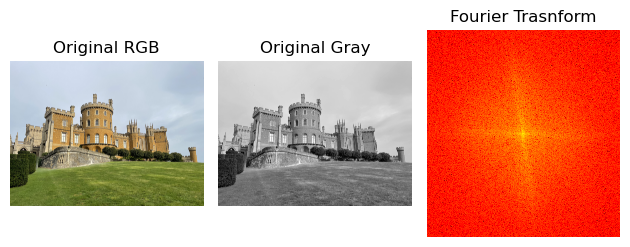

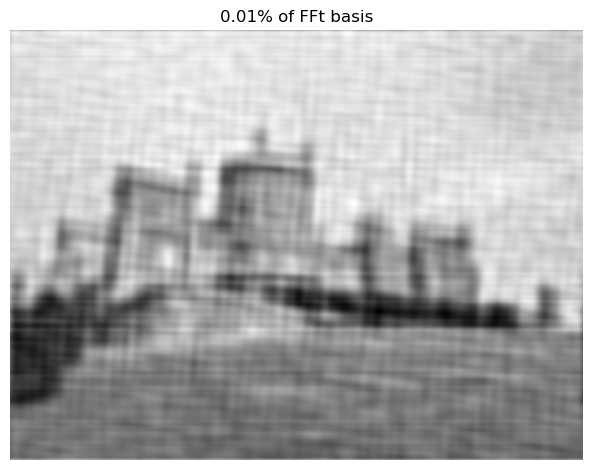

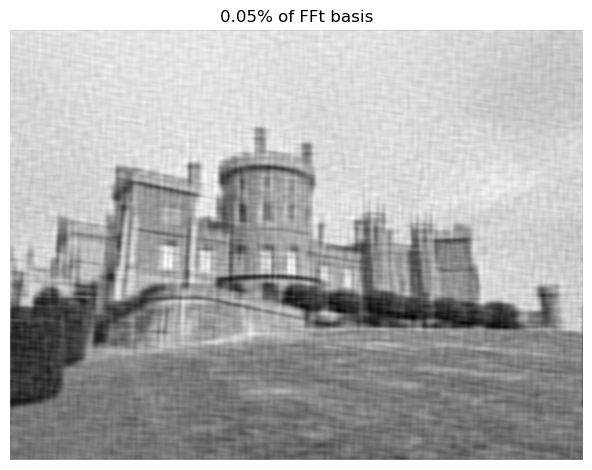

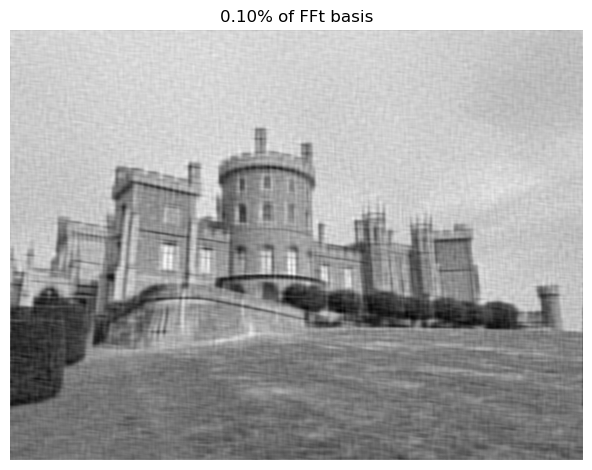

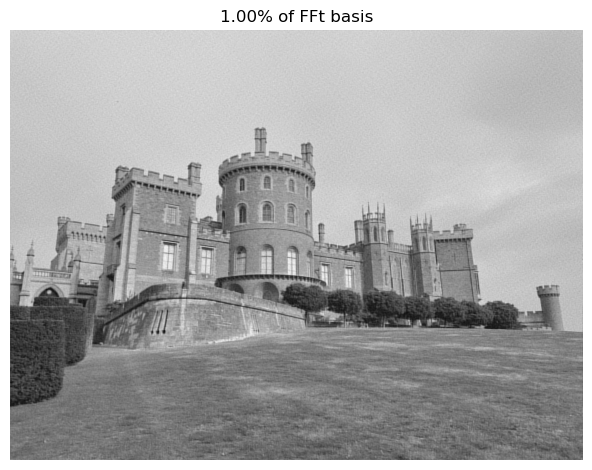

In [37]:
#Visuliase the orginal image and its Fourier transform
plt.figure()
#Original RGB
plt.subplot(2,3,1)
plt.imshow(nparray1)
plt.axis('off')
plt.title('Original RGB')
#Original Gray
plt.subplot(2,3,2)
plt.imshow(grayimg1, cmap='gray')
plt.axis('off')
plt.title('Original Gray')
#Fourier Transform of the Original image
plt.subplot(2,3,3)
plt.pcolor(np.log(grayimg1_fft_shift),cmap='hot')
plt.axis('off')
plt.title('Fourier Trasnform')
plt.tight_layout()
plt.show()

#define the width and height of the image
nx,ny = grayimg1.shape

#apply 2D fast Fourier transform on the image
Xf = np.fft.fft2(grayimg1)
XfSort = np.sort(np.abs(Xf.reshape(-1))) # reshape into a vector and sort by magnitude from largest to smallest frequencies
    
#image compression process
for keep in (0.0001,0.0005, 0.001,0.01):
    #compute the frequency threshold 
    thresh = XfSort[int(np.floor((1-keep)*len(XfSort)))]
    #capture all frequencies above the threshold and drop/zero out the small ones
    freq = np.abs(Xf) > thresh 
    #compute the frequency matrix that contains the selected frequencies
    XfLOW = Xf * freq  
    #construct the compressed image by applying the inverse of fft
    XLOW = np.fft.ifft2(XfLOW).real  
    
    #compute the kept FFt basis percentage
    count = nx*ny-np.sum(np.sum(freq))
    percent = 100 - count/(nx*ny)*100
    # Format percent as a string with two decimal points
    percent = "{:.2f}".format(percent)
    
    #show the compressed image for the current percentage
    plt.figure()
    plt.imshow(XLOW,cmap='gray')
    plt.axis('off')
    plt.title(str(percent) + '% of FFt basis')
    plt.show()

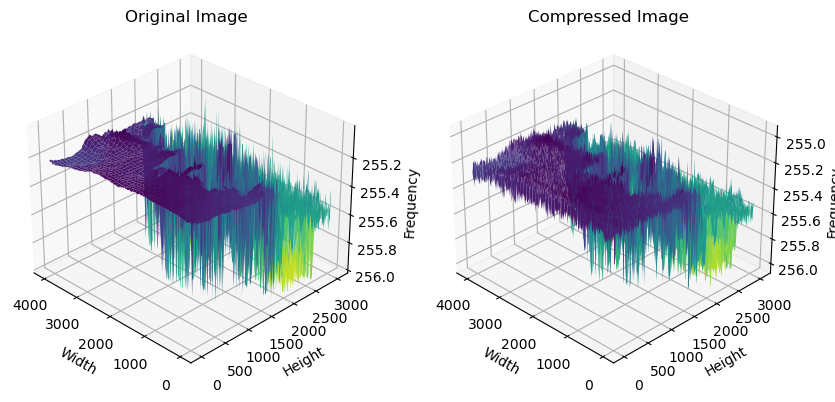

In [81]:
#show the pixel intensity as a surface/3d plot
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['figure.figsize'] = [10,8]

fig = plt.figure()
ax = fig.add_subplot(121,projection = '3d')
X,Y = np.meshgrid(np.arange(1,np.shape(grayimg1)[1]+1),np.arange(1,np.shape(grayimg1)[0]+1))
ax.plot_surface(X[0::10,0::10],Y[0::10,0::10],256-grayimg1[0::10,0::10],cmap='viridis',edgecolor = 'none')
ax.mouse_init()
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_zlabel('Frequency')
ax.set_title('Original Image')
ax.view_init(210,45)
ax = fig.add_subplot(122,projection = '3d')
X,Y = np.meshgrid(np.arange(1,np.shape(XLOW)[1]+1),np.arange(1,np.shape(XLOW)[0]+1))
ax.plot_surface(X[0::10,0::10],Y[0::10,0::10],256-XLOW[0::10,0::10],cmap='viridis',edgecolor = 'none')
ax.mouse_init()
ax.view_init(210,45)
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_zlabel('Frequency')
ax.set_title('Compressed Image')
plt.show()

## $\color{Blue}{\text{Edge Detection}}$  <a class="anchor" id="section4"></a>

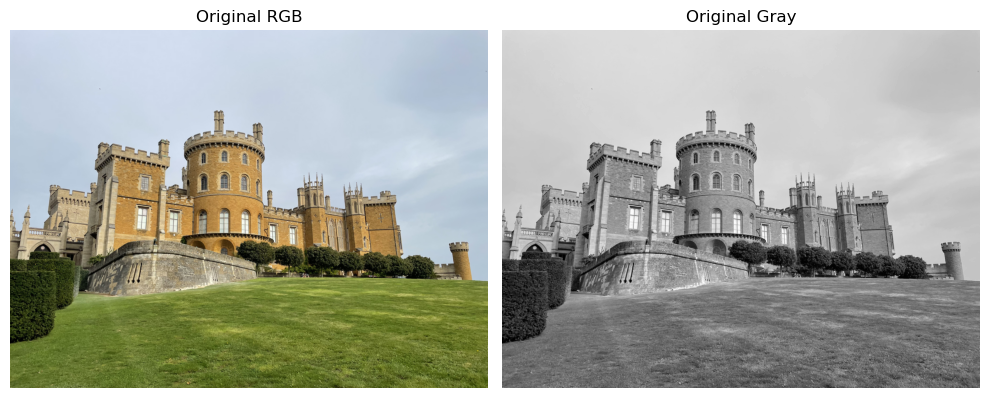

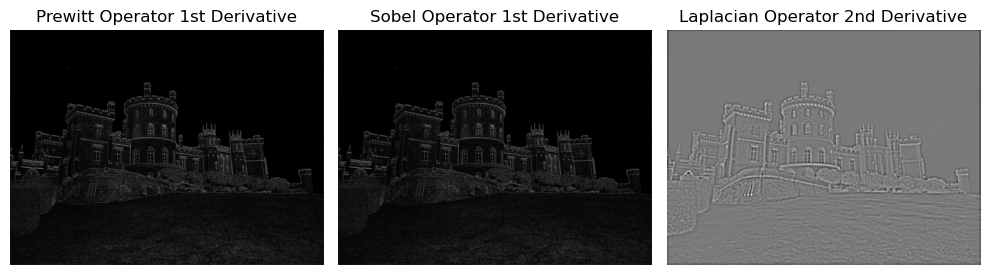

In [149]:
from scipy import ndimage

#first derivative
#Prewitt operator
prewitt_h = ndimage.prewitt(grayimg1, axis = 0,mode='constant') #apply the 1st derivative horizontally
prewitt_v = ndimage.prewitt(grayimg1, axis = 1,mode='constant') #aply the 1st derivative vertically
magnitude_prewitt = np.sqrt(prewitt_h**2+prewitt_v**2) #calculate magnitude
magnitude_prewitt *= (255.0/magnitude_prewitt.max()) #normalisation
#Sobel operator
sobel_h = ndimage.sobel(grayimg1, axis = 0,mode='constant') #apply the 1st derivative horizontally
sobel_v = ndimage.sobel(grayimg1, axis = 1,mode='constant') #aply the 1st derivative vertically
magnitude_sobel = np.sqrt(sobel_h**2+sobel_v**2) #calculate magnitude
magnitude_sobel *= (255.0/magnitude_sobel.max()) #normalisation

#second derivative
#laplacian
#A zero crossing is a point where the sign of a mathematical function changes in the graph of the function. 
#In image processing, the edge detection using Laplacian filter takes place by marking the points that leads to
#zero in graph as potential edge points. This method works fine on images for finding edges in both directions, 
#but it works poorly when noises are found in the image. So, we usually smooth the image applying Guassian filter 
#prior to Laplacian filter. It’s often termed Laplacian of Guassian (LoG) filter. 
sigma = 10 #The standard deviations of the Gaussian filter are given for each axis as a sequence, 
#or as a single number, in which case it is equal for all axes.
laplacian = ndimage.gaussian_laplace(grayimg1,sigma,mode='constant') 
laplacian  *= (255.0/laplacian.max())

#Visuliase the orginal image and its Fourier transform
plt.figure()
#Original RGB
plt.subplot(1,2,1)
plt.imshow(nparray1)
plt.axis('off')
plt.title('Original RGB')
#Original Gray
plt.subplot(1,2,2)
plt.imshow(grayimg1, cmap='gray')
plt.axis('off')
plt.title('Original Gray')
plt.tight_layout()
plt.show()
#show the edge detection methdos
plt.figure()
#prewitt
plt.subplot(1,3,1)
plt.imshow(magnitude_prewitt, cmap='gray')
plt.title('Prewitt Operator 1st Derivative')
plt.axis('off')
#Sobel
plt.subplot(1,3,2)
plt.imshow(magnitude_sobel, cmap='gray')
plt.title('Sobel Operator 1st Derivative')
plt.axis('off')
#Laplacian
plt.subplot(1,3,3)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Operator 2nd Derivative')
plt.axis('off')
plt.tight_layout()
plt.show()